In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

#### Task 1: Read data, Parse dates and index to `date` column

In [2]:
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv'
df = pd.read_csv(url, index_col = 'date', parse_dates=True)

In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Task 2 : Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [5]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]


#### Task 3 : Create a `draw_line_plot` function that uses Matplotlib to draw a line chart.

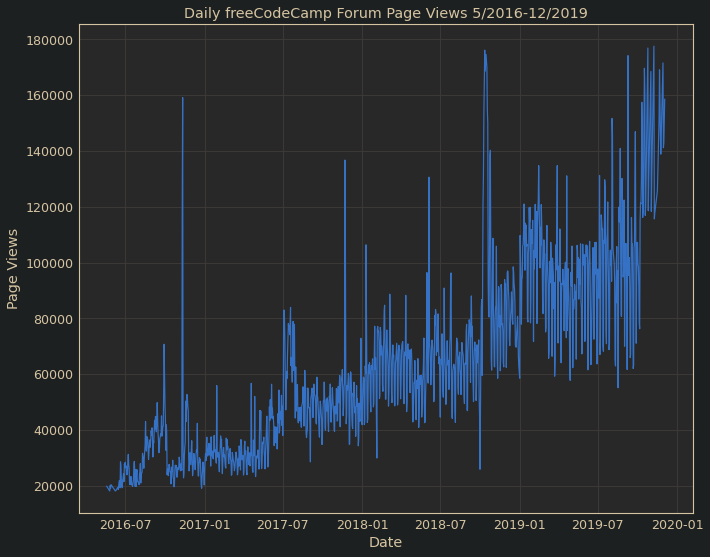

In [9]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(11, 9))
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    sns.lineplot(x = 'date', y = 'value', data= df, ax = ax)   
    
     # Save image
    fig.savefig('page_views_line_plot.png')
    return fig
draw_line_plot()

#### Task 4 : Create a `draw_bar_plot` function that draws a bar chart. It should show average daily page views for each month grouped by year. 

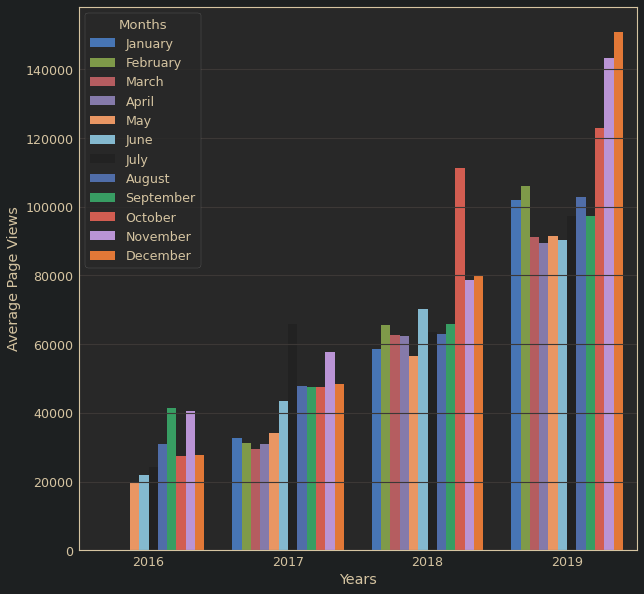

In [11]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar['year'] = [d.year for d in df_bar.date]
    df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
    df_bar = df_bar.groupby(['year', 'month']).mean().reset_index()
    labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

	# Draw bar plot
    fig, ax = plt.subplots(figsize= [10.0, 10.0])
    sns.barplot(x='year', y='value', hue='month', data=df_bar, ax=ax, hue_order=labels)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(loc='upper left', title='Months')
    
    # Save image
    fig.savefig('page_views_bar_plot.png')
    return fig
draw_bar_plot()

#### Task 5 : Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time.

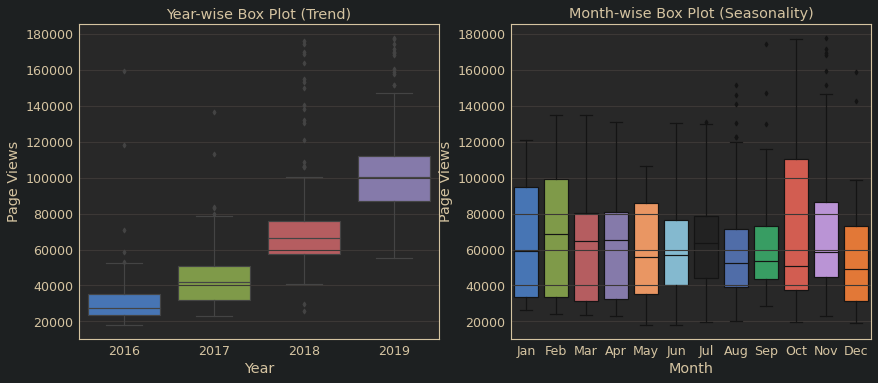

In [13]:
def draw_box_plot():
    # Prepare data for box plots.
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14.2, 5.8))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1, fliersize=3.5)
    df_box.reindex(labels)
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2, fliersize=3.5, order=labels)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()